In [5]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data


X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
samples={}
for activity,label in classes.items():
    idx=np.where(y_train==label)[0][0]
    samples[activity]=X_train[idx]

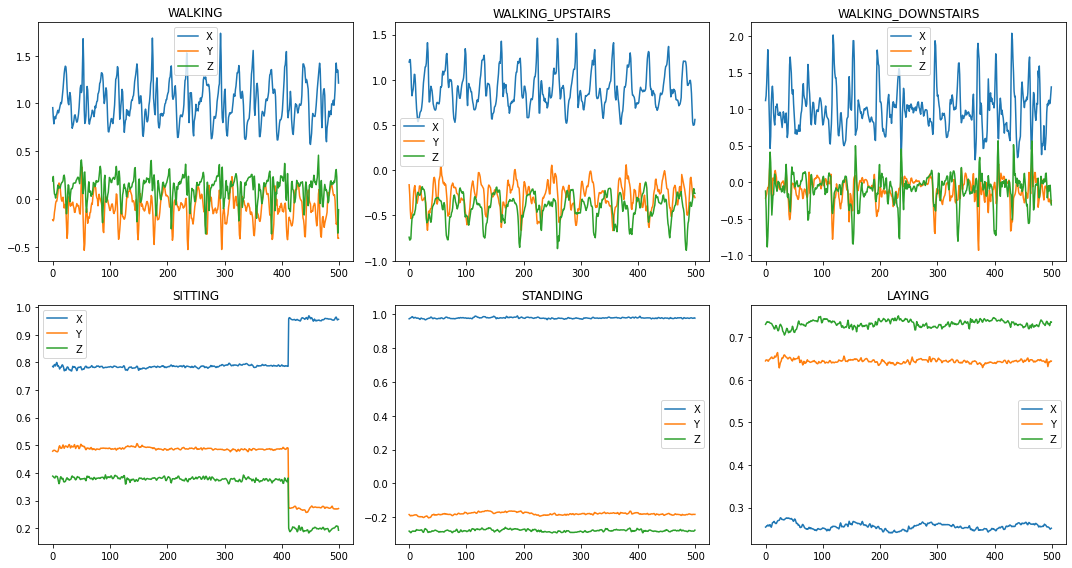

In [8]:
plt.figure(figsize=(15,8))
import matplotlib.pyplot as plt
import seaborn as sns
for i,(activity,data) in enumerate(samples.items()):
    plt.subplot(2,3,i+1)
    plt.plot(data[:,0],label='X')
    plt.plot(data[:,1],label='Y')
    plt.plot(data[:,2],label='Z')
    plt.title(activity)
    plt.legend()
plt.tight_layout()

In [9]:
# clealry the moving and static activites are different, can be differentiated easily

In [10]:
# lets flatten the input, for trainnig a tree
X_train_flat=X_train.reshape(126,1500)
X_test_flat=X_test.reshape(54,1500)

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree_raw=DecisionTreeClassifier(random_state=42)
tree_raw.fit(X_train_flat,y_train)
predictions_raw=tree_raw.predict(X_test_flat)

In [12]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
print(classification_report(y_test,predictions_raw))

              precision    recall  f1-score   support

           1       0.25      0.22      0.24         9
           2       0.50      0.56      0.53         9
           3       0.25      0.11      0.15         9
           4       0.67      0.89      0.76         9
           5       0.80      0.89      0.84         9
           6       0.90      1.00      0.95         9

    accuracy                           0.61        54
   macro avg       0.56      0.61      0.58        54
weighted avg       0.56      0.61      0.58        54



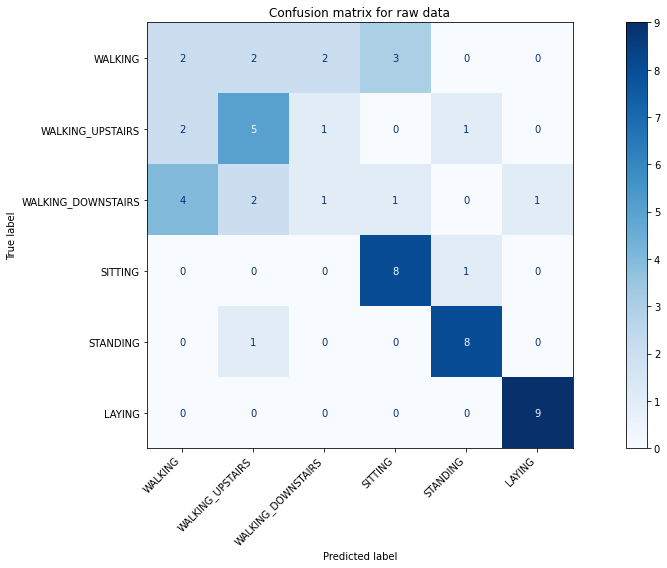

In [13]:
cm=confusion_matrix(y_test,predictions_raw)
cm_beautified=ConfusionMatrixDisplay(cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(15, 8))  
cm_beautified.plot(cmap='Blues', ax=ax)
plt.title('Confusion matrix for raw data')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()

In [14]:
# As we had seen earlier from the earlier time series plots as well that the static activities are easy to learn as the 
# values are kindoff static and not very dynamic.
# However the moving activities are difficult to differentiate among, since all have very dynamic changes in the timeseries
# plot and even with naked eyes, a human might find it difficult to differnetiate them.

In [15]:
# Let's see some wrongly classified classes and try to understand the reasons
# We can see that walking is misclassified as walking down , lets see the reason

In [16]:
misclassified={}
for idx,label in enumerate(predictions_raw):
    if label==1 and y_test[idx]==3:
        misclassified[idx]=X_test[idx]

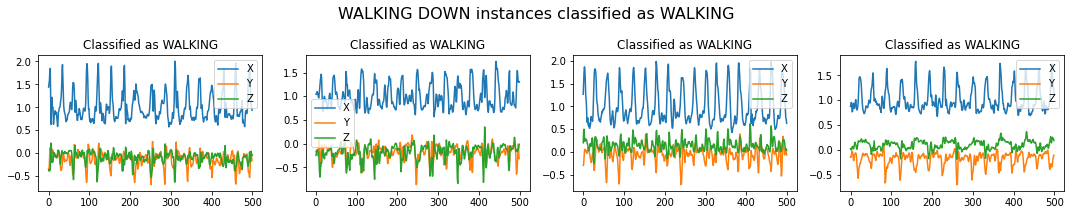

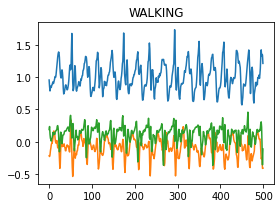

In [17]:
fig=plt.figure(figsize=(15,3))
fig.suptitle('WALKING DOWN instances classified as WALKING',fontsize=16)
for i,(idx,data) in enumerate(misclassified.items()):
    plt.subplot(1,4,i+1)
    plt.plot(data[:,0],label='X')
    plt.plot(data[:,1],label='Y')
    plt.plot(data[:,2],label='Z')
    plt.legend()
    plt.title('Classified as WALKING')
plt.tight_layout()
ax=plt.figure(figsize=(4,3))
plt.plot(samples['WALKING'])
plt.title('WALKING')
plt.tight_layout()

In [18]:
# Lets try some other plot to confirm the similarity

Text(0.5, 1.0, 'WALKING')

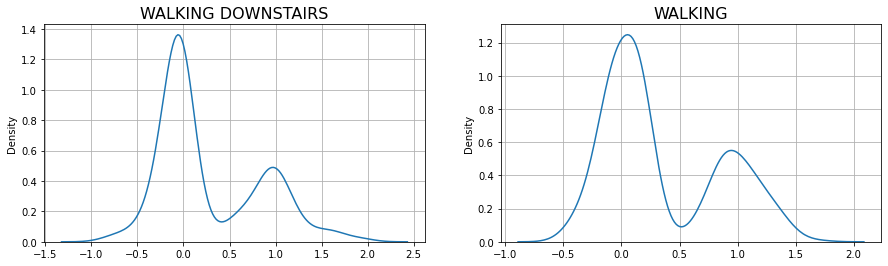

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
for activity,data in samples.items():
    samples[activity]=data.reshape(1500)

# sns.set_palette()
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.grid(True)
sns.kdeplot(samples['WALKING_DOWNSTAIRS'])
plt.title('WALKING DOWNSTAIRS',fontsize=16)

plt.subplot(1,2,2)
plt.grid(True)
sns.kdeplot(samples['WALKING'])
plt.title('WALKING',fontsize=16)


In [20]:
features=[]
with open('UCI HAR Dataset/features.txt') as f:
    features=[line.split()[1] for line in f.readlines()]
print(f'Total features: {len(features)}')

Total features: 561


In [21]:
X_train_extracted=pd.read_csv('UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)
X_train_extracted.columns=features
X_train_extracted['subject']=pd.read_csv('UCI HAR Dataset/train/subject_train.txt',delim_whitespace=True,header=None).squeeze()

y_train_extracted=pd.read_csv('UCI HAR Dataset/train/y_train.txt',names=['Activity']).squeeze()
train=X_train_extracted
train['Activity']=y_train_extracted
train['ActivityName']=train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

print(f'X_train_extracted shape: {X_train_extracted.shape}')
print(f'y_train_extracted shape: {y_train_extracted.shape}')
print(f'train shape: {train.shape}')

X_train_extracted shape: (7352, 564)
y_train_extracted shape: (7352,)
train shape: (7352, 564)


In [22]:
X_test_extracted=pd.read_csv('UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)
X_test_extracted.columns=features
X_test_extracted['subject']=pd.read_csv('UCI HAR Dataset/test/subject_test.txt',delim_whitespace=True,header=None).squeeze()

y_test_extracted=pd.read_csv('UCI HAR Dataset/test/y_test.txt',names=['Activity']).squeeze()
test=X_test_extracted
test['Activity']=y_test_extracted
test['ActivityName']=test['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})

print(f'X_test_extracted shape: {X_test_extracted.shape}')
print(f'y_test_extracted shape: {y_test_extracted.shape}')
print(f'test shape: {test.shape}')

X_test_extracted shape: (2947, 564)
y_test_extracted shape: (2947,)
test shape: (2947, 564)


In [23]:
print(f'Number of NaN elements in train: {train.isna().values.sum()}')
print(f'Number of Null elements in train: {train.isnull().values.sum()}')
print()
print(f'Number of NaN elements in test: {test.isna().values.sum()}')
print(f'Number of Null elements in test: {test.isnull().values.sum()}')

Number of NaN elements in train: 0
Number of Null elements in train: 0

Number of NaN elements in test: 0
Number of Null elements in test: 0


In [24]:
pd.Series(y_train).value_counts()

2    21
6    21
5    21
1    21
4    21
3    21
Name: count, dtype: int64

In [25]:
# Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

In [26]:
# !pip install tsfel

In [27]:
import tsfel

In [77]:
tsfel_features=tsfel.get_features_by_domain()
X_train_tsfel=tsfel.time_series_features_extractor(tsfel_features,X_train,fs=50)

*** Feature extraction started ***



*** Feature extraction finished ***


In [80]:
X_test_tsfel=tsfel.time_series_features_extractor(tsfel_features,X_test,fs=50)

*** Feature extraction started ***



*** Feature extraction finished ***


In [82]:
tree_tsfel=DecisionTreeClassifier(random_state=42)
tree_tsfel.fit(X_train_tsfel,y_train)
predictions_tsfel=tree_tsfel.predict(X_test_tsfel)

In [83]:
print(classification_report(y_test,predictions_tsfel))

              precision    recall  f1-score   support

           1       0.86      0.67      0.75         9
           2       0.73      0.89      0.80         9
           3       0.78      0.78      0.78         9
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00         9

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



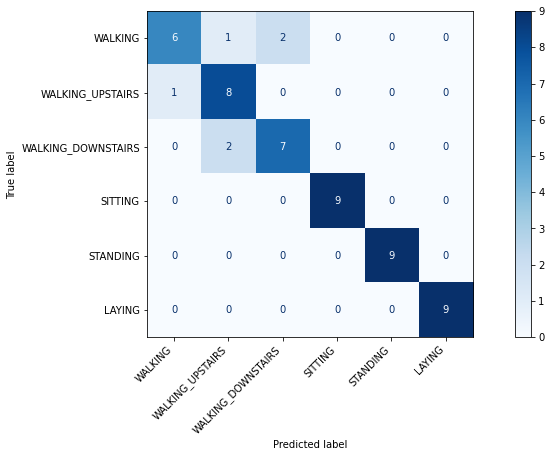

In [92]:
cm=confusion_matrix(y_test,predictions_tsfel)
cm_beautified=ConfusionMatrixDisplay(cm,display_labels=classes)
fig,ax=plt.subplots(figsize=(15,6))
cm_beautified.plot(cmap='Blues',ax=ax)
plt.xticks(rotation=45,ha='right')
plt.show()

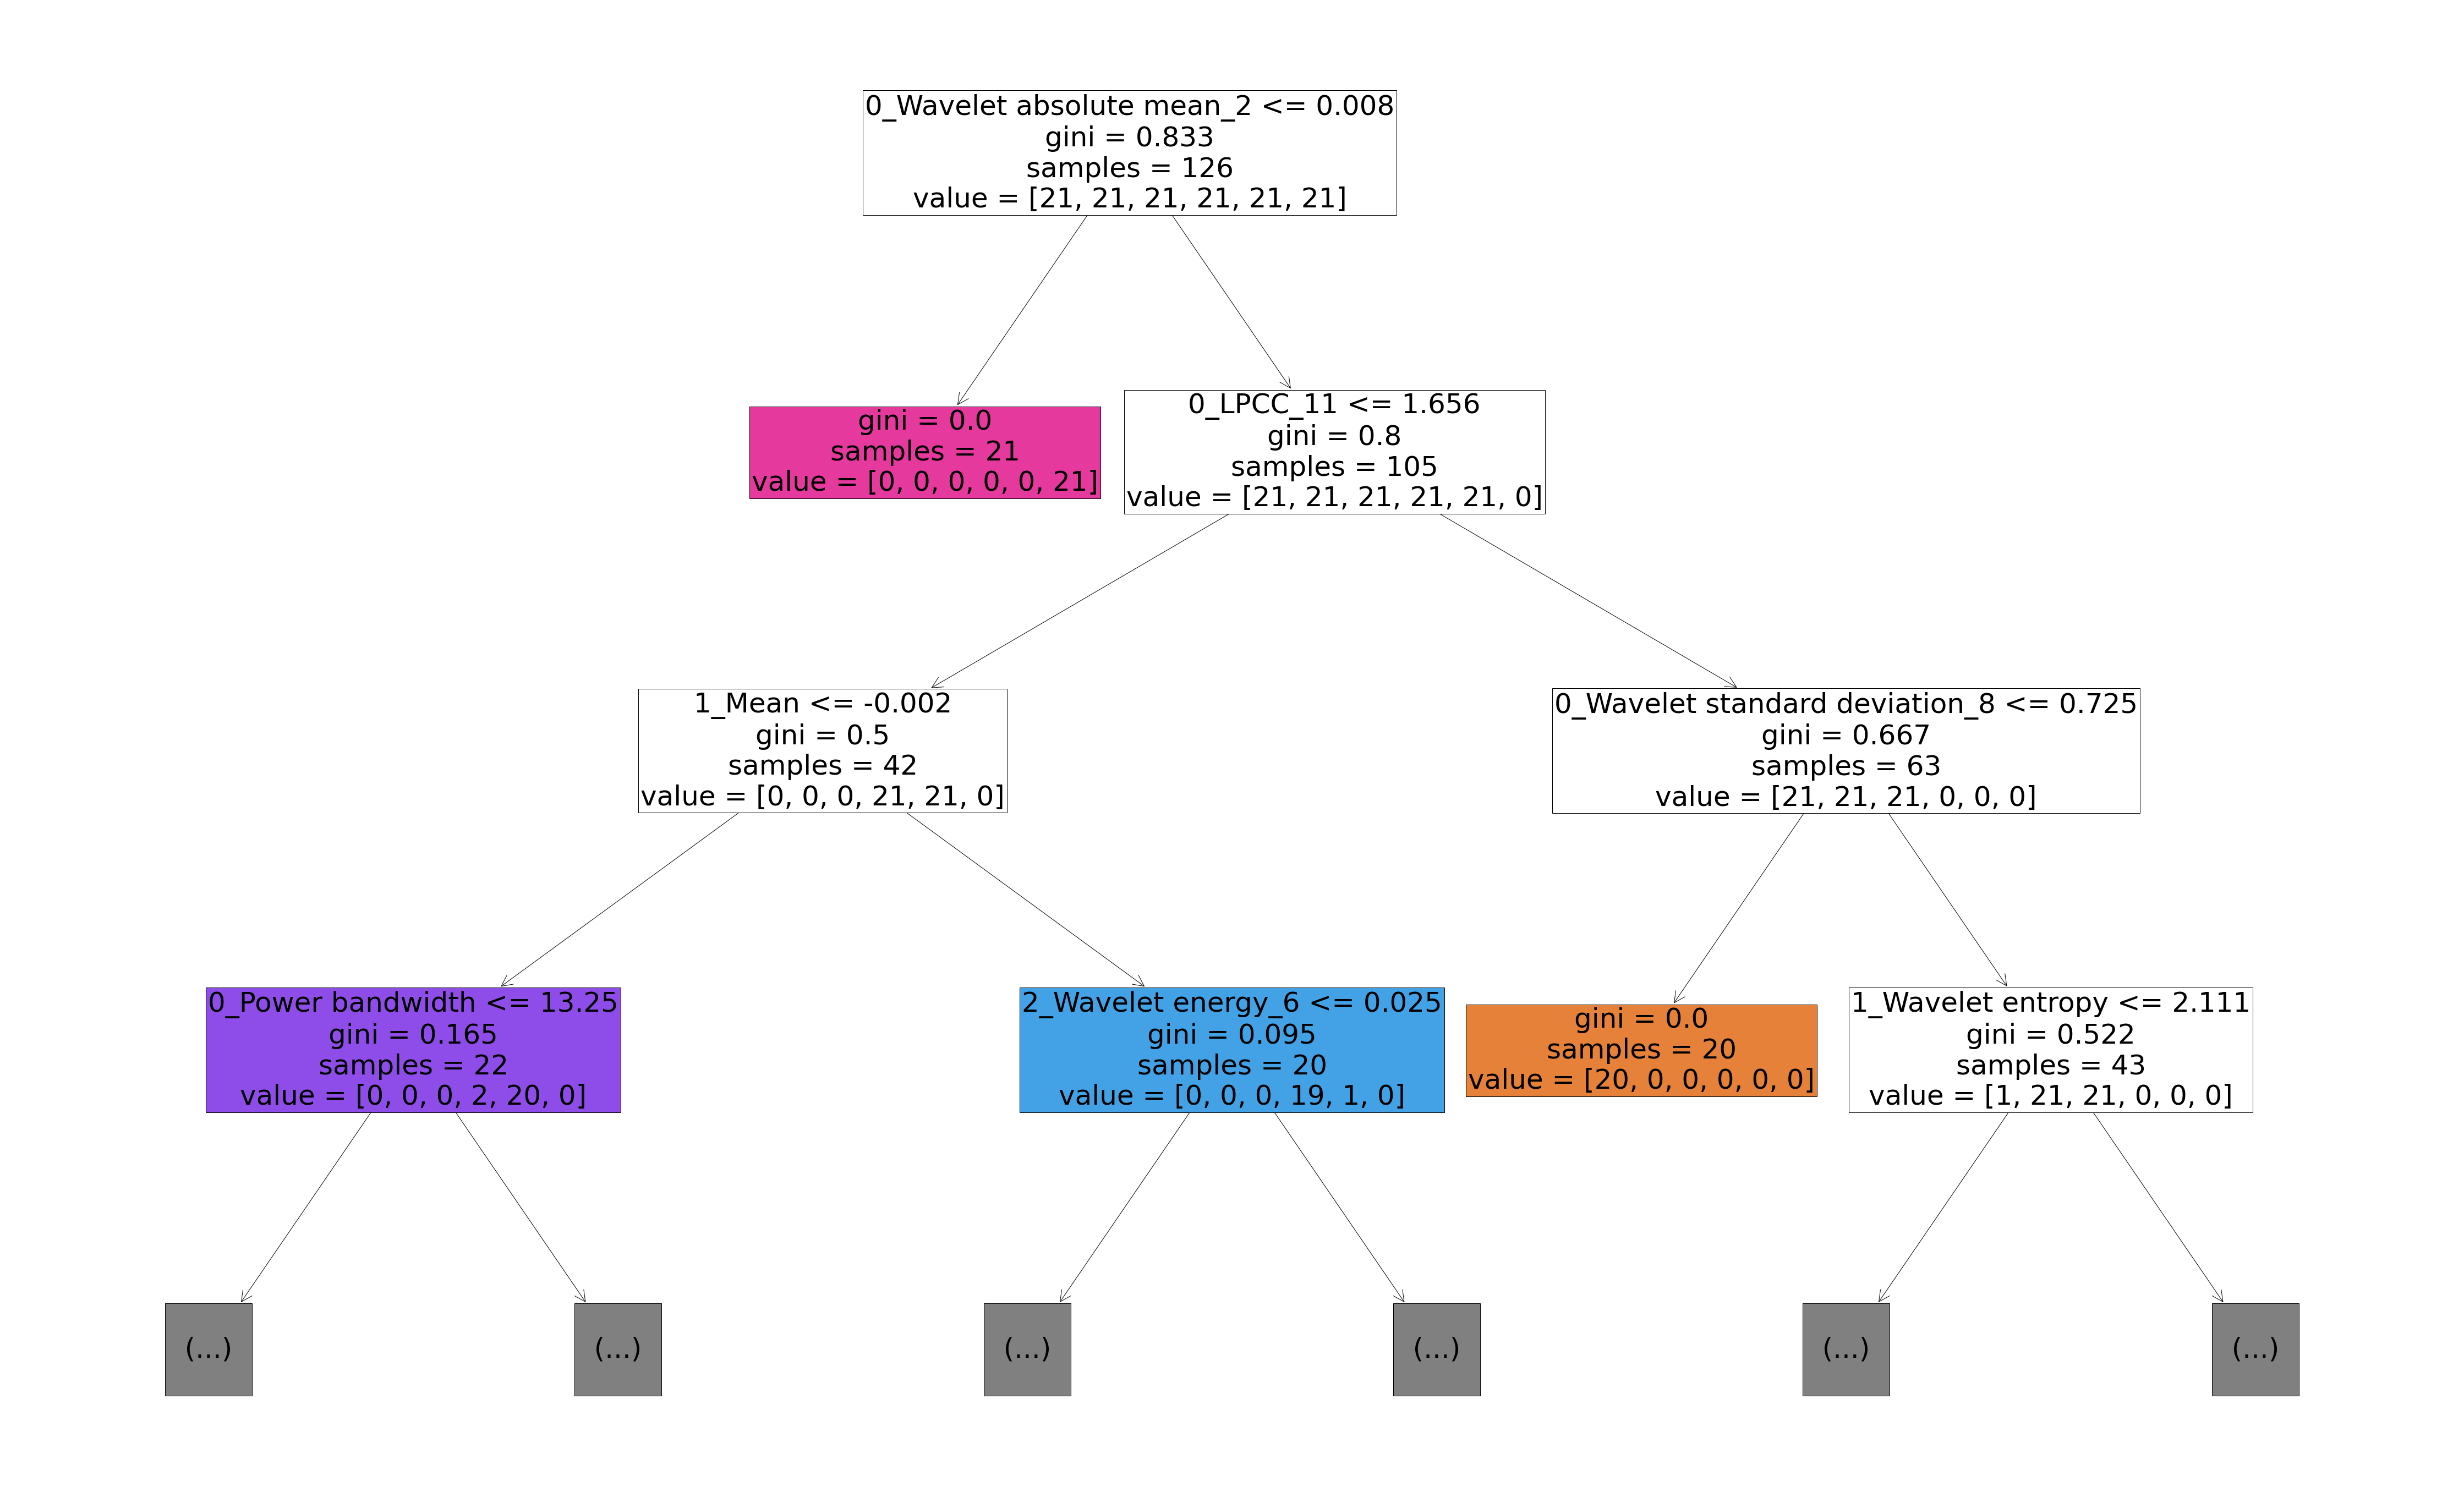

In [116]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,50))
plot_tree(tree_tsfel,fontsize=50,max_depth=3,filled=True,feature_names=X_train_tsfel.columns)
plt.show()

In [95]:
# df_train=pd.DataFrame()
# for Activity in train['ActivityName'].unique():
#     activity_data=train[train['ActivityName']==Activity].iloc[:21]
#     df_train=pd.concat([df_train,activity_data],axis=0)
# df_train=df_train.sample(frac=1).reset_index(drop=True)

In [22]:
# pd.Series(y_test).value_counts()

In [23]:
# df_test=pd.DataFrame()
# for Activity in test['ActivityName'].unique():
#     activity_data=test[test['ActivityName']==Activity].iloc[:9]
#     df_test=pd.concat([df_test,activity_data],axis=0)
# df_test=df_test.sample(frac=1).reset_index(drop=True)

In [24]:
# df_train_x=df_train.drop(['Activity','ActivityName','subject'],axis=1)
# df_train_y=df_train['Activity']
# df_test_x=df_test.drop(['Activity','ActivityName','subject'],axis=1)
# df_test_y=df_test['Activity']

In [25]:
# tree_extracted=DecisionTreeClassifier(random_state=42)
# tree_extracted.fit(df_train_x,df_train_y)
# predictions_extracted=tree_extracted.predict(df_test_x)

In [26]:
# print(classification_report(df_test_y,predictions_extracted))

In [27]:
# predictions_extracted

In [169]:
df_train_x=train.drop(['Activity','ActivityName','subject'],axis=1)
df_train_y=train['Activity']
df_test_x=test.drop(['Activity','ActivityName','subject'],axis=1)
df_test_y=test['Activity']

In [170]:
tree_extracted=DecisionTreeClassifier(random_state=42)
tree_extracted.fit(df_train_x,df_train_y)
predictions_extracted=tree_extracted.predict(df_test_x)

In [171]:
print(classification_report(df_test_y,predictions_extracted))

              precision    recall  f1-score   support

           1       0.83      0.92      0.87       496
           2       0.83      0.78      0.80       471
           3       0.89      0.83      0.86       420
           4       0.83      0.76      0.80       491
           5       0.80      0.86      0.83       532
           6       1.00      1.00      1.00       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947



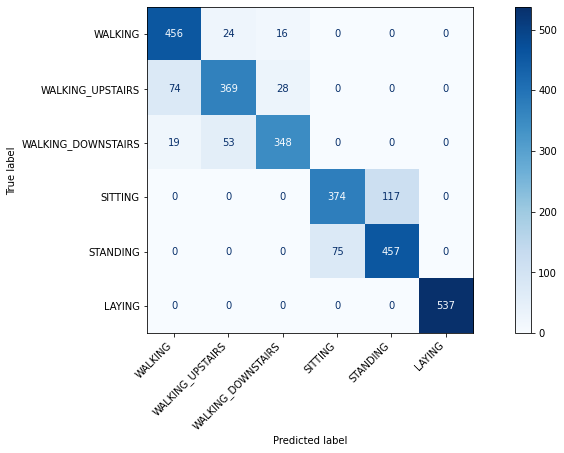

In [181]:
cm=confusion_matrix(df_test_y,predictions_extracted)
fig,ax=plt.subplots(figsize=(15,6))
cm=ConfusionMatrixDisplay(cm,display_labels=classes)
cm.plot(cmap='Blues',ax=ax)
plt.xticks(rotation=45,ha='right')
plt.show()

In [122]:
from sklearn.tree import export_text

tree_rules=export_text(tree_extracted,feature_names=list(df_train_x.columns))
print(tree_rules)

|--- tGravityAcc-min()-X <= 0.10
|   |--- class: 6
|--- tGravityAcc-min()-X >  0.10
|   |--- fBodyAccJerk-bandsEnergy()-1,16 <= -0.97
|   |   |--- angle(Y,gravityMean) <= 0.14
|   |   |   |--- tGravityAcc-energy()-Y <= -1.00
|   |   |   |   |--- tGravityAcc-min()-Z <= 0.06
|   |   |   |   |   |--- tGravityAcc-min()-Z <= -0.20
|   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |--- tGravityAcc-min()-Z >  -0.20
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- tGravityAcc-min()-Z >  0.06
|   |   |   |   |   |--- tBodyGyroJerk-max()-X <= -0.98
|   |   |   |   |   |   |--- tBodyAccJerk-arCoeff()-X,3 <= 0.41
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- tBodyAccJerk-arCoeff()-X,3 >  0.41
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- tBodyGyroJerk-max()-X >  -0.98
|   |   |   |   |   |   |--- class: 5
|   |   |   |--- tGravityAcc-energy()-Y >  -1.00
|   |   |   |   |--- tBodyGyro-max()-X <= -0.87
|   |   |   |   |   |--- tBodyGyro

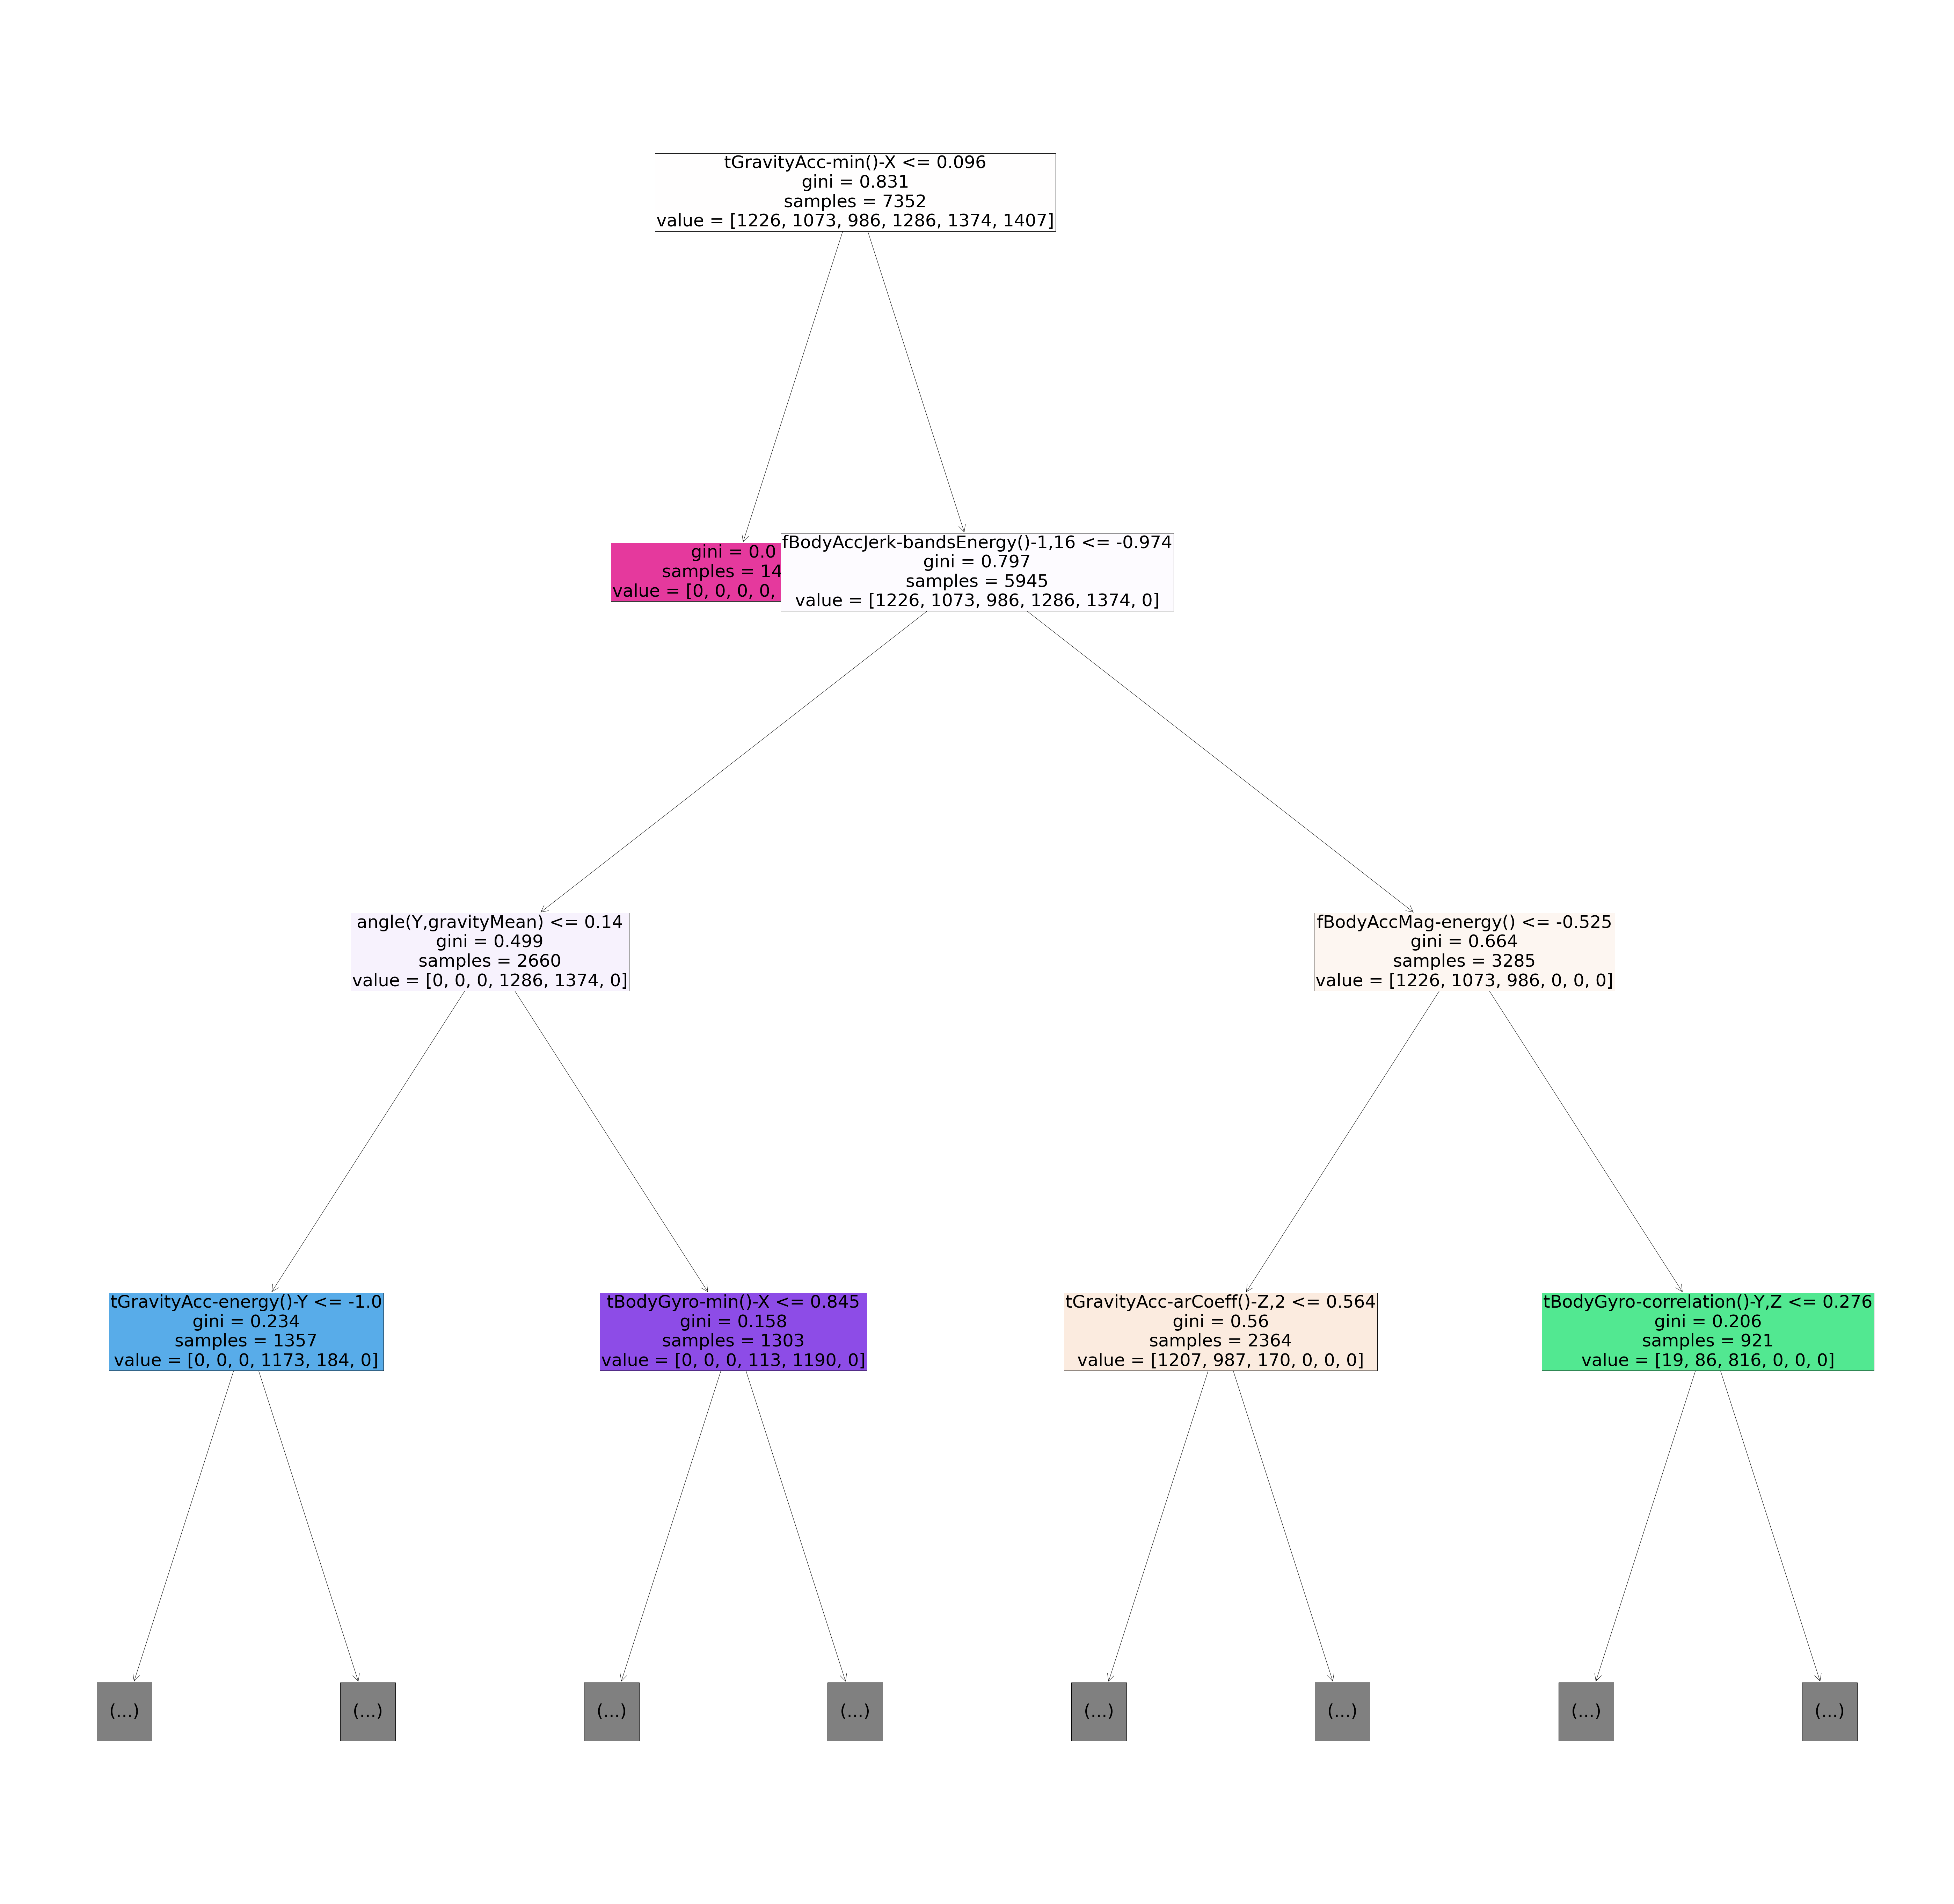

In [124]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,100))
plot_tree(tree_extracted,feature_names=df_train_x.columns,filled=True,max_depth=3,fontsize=50)
plt.show()

Text(0.5, 1.0, 'First Split i.e (tGravityAcc-min()-X)')

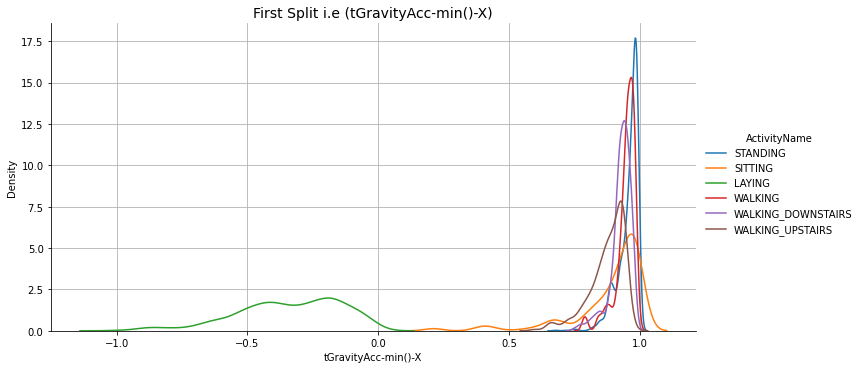

In [125]:
# Lets try the 
facetgrid=sns.FacetGrid(train,hue='ActivityName',height=5,aspect=2)
plt.grid(True)
facetgrid.map(sns.kdeplot,'tGravityAcc-min()-X').add_legend()
plt.title('First Split i.e (tGravityAcc-min()-X)',fontsize=14)

Text(0.5, 1.0, 'First Split i.e (tGravityAcc-min()-X)')

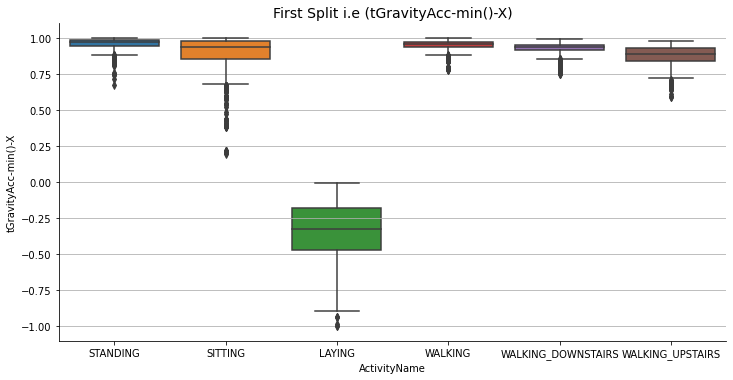

In [126]:
facetgrid=sns.FacetGrid(train,hue='ActivityName',height=5,aspect=2)
plt.grid(True)

sns.boxplot(x='ActivityName',y='tGravityAcc-min()-X',data= train)
plt.title('First Split i.e (tGravityAcc-min()-X)',fontsize=14)

In [137]:
from sklearn.metrics import accuracy_score

In [138]:
X_train_flat.shape

(126, 1500)

In [162]:
# Raw data

accuracies_raw=[]
for depth in range(2,9):
    clf=DecisionTreeClassifier(max_depth=depth,random_state=42)
    clf.fit(X_train_flat,y_train)
    predictions=clf.predict(X_test_flat)
    accuracy=accuracy_score(y_test,predictions)
    accuracies_raw.append(accuracy*100)

In [163]:
accuracies_raw

[42.592592592592595,
 53.70370370370371,
 59.25925925925925,
 59.25925925925925,
 64.81481481481481,
 57.407407407407405,
 61.111111111111114]

In [164]:
# tsfel data

accuracies_tsfel=[]
for depth in range(2,9):
    clf=DecisionTreeClassifier(max_depth=depth,random_state=42)
    clf.fit(X_train_tsfel,y_train)
    predictions=clf.predict(X_test_tsfel)
    accuracy=accuracy_score(y_test,predictions)
    accuracies_tsfel.append(accuracy*100)

In [165]:
accuracies_tsfel

[50.0,
 75.92592592592592,
 88.88888888888889,
 88.88888888888889,
 88.88888888888889,
 88.88888888888889,
 88.88888888888889]

In [166]:
# given data

accuracies_given=[]
for depth in range(2,9):
    clf=DecisionTreeClassifier(max_depth=depth,random_state=42)
    clf.fit(df_train_x,df_train_y)
    predictions=clf.predict(df_test_x)
    accuracy=accuracy_score(df_test_y,predictions)
    accuracies_given.append(accuracy*100)

In [167]:
accuracies_given

[53.10485239226331,
 72.24295894129624,
 80.96369189005769,
 83.8140481845945,
 85.44282321004411,
 86.18934509670851,
 86.83406854428232]

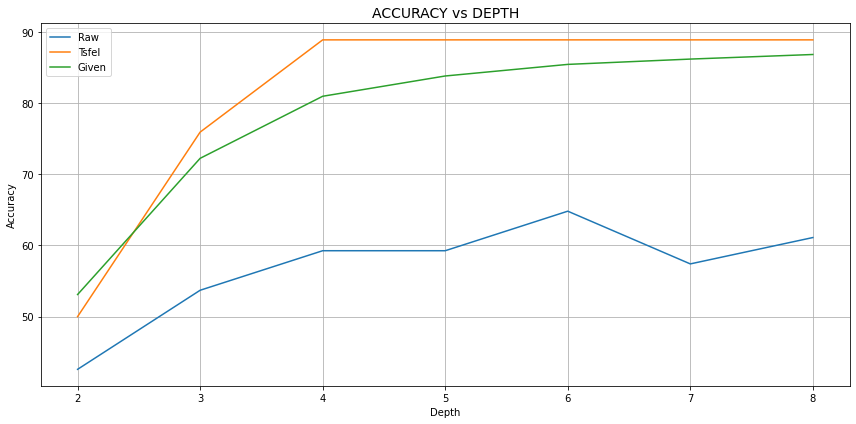

In [168]:
depths=range(2,9)
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(depths,accuracies_raw,label='Raw')
plt.plot(depths,accuracies_tsfel,label='Tsfel')
plt.plot(depths,accuracies_given,label='Given')
plt.title('ACCURACY vs DEPTH',fontsize=14)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()

In [ ]:
# Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?